# Plot scan

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from auxPlots import readContours
import seaborn as sns
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

#### Get contours from different sources

In [2]:
# Mono-Jet (CMS-EXO-20-004)
monoJetDict = readContours('./monojet_curve_sms.csv')
print('MonoJet=',monoJetDict.keys())
    
# mtt (CMS-TOP-20-001)
cmsMTTdict = readContours('./CMS_mtt_oneLoop_contours.csv')
print('cmsMTT=',cmsMTTdict.keys())
cmsMTTdictEFT = readContours('./CMS_mtt_eft_contours.csv')
print('cmsMTTEFT=',cmsMTTdictEFT.keys())

# Direct searches (SModelS)
directDict = readContours('./SModelS_contours.csv')
print('direct=',directDict.keys())

MonoJet= dict_keys([0.8, 1.0])
cmsMTT= dict_keys([10.0, 12.0, 15.0, 20.0])
cmsMTTEFT= dict_keys([10.0, 12.0, 15.0, 20.0])
direct= dict_keys([1.0])


In [7]:
# Select contour values:
colors = sns.color_palette('deep')
plots = {'Mono Jet' : {'contour' : 1.0, 'dataDict' : monoJetDict, 
                       'fill' : True, 'linestyle' : 'solid', 'color' : colors[0]},
         'Stop Searches' : {'contour' : 1.0, 'dataDict' : directDict, 
                            'fill' : True, 'linestyle' : 'solid', 'color' : colors[1]},
         r'$m(t\bar{t})$, $y_{DM} = 10$ (1-loop)' : {'contour' : 10.0, 'dataDict' : cmsMTTdict, 
                                                     'fill' : False, 'linestyle' : 'solid', 'color' : colors[2]},
         r'$m(t\bar{t})$, $y_{DM} = 12$ (1-loop)' : {'contour' : 12.0, 'dataDict' : cmsMTTdict, 
                                                     'fill' : False, 'linestyle' : 'solid', 'color' : colors[3]},
         r'$m(t\bar{t})$, $y_{DM} = 10$ (EFT)' : {'contour' : 10.0, 'dataDict' : cmsMTTdictEFT, 
                                                  'fill' : False, 'linestyle' : 'dashed', 'color' : colors[2]},
         r'$m(t\bar{t})$, $y_{DM} = 12$ (EFT)' : {'contour' : 12.0, 'dataDict' : cmsMTTdictEFT, 
                                                  'fill' : False, 'linestyle' : 'dashed', 'color' : colors[3]},
         }

### Plot Exclusions

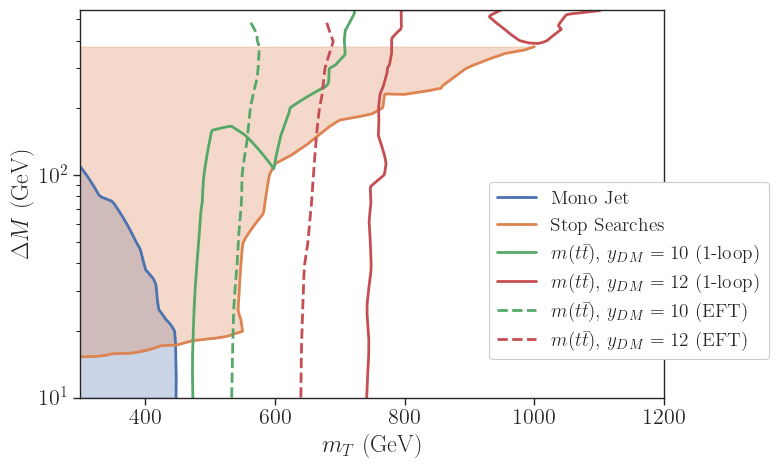

In [9]:
plt.figure(figsize=(8,5))

for p,pInfo in plots.items():
    data = pInfo['dataDict'][pInfo['contour']]
    x = data['mST_GeV']
    y = data['deltaM_GeV']    
    plt.plot(x,y,label=p,linewidth=2,color=pInfo['color'],linestyle=pInfo['linestyle'])
    if pInfo['fill']:
        plt.fill_betweenx(y,x,200,alpha=0.3,color=pInfo['color'])
        
plt.legend(loc=(0.7,0.1),fontsize=14,framealpha=1.0)
plt.yscale('log')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(300,1200)
plt.ylim(10,550)
plt.tight_layout()
plt.savefig('allExclusions.png')
plt.show()